In [ ]:
PATHS MIGHT NEED TO BE FIXED TO RUN THESE CELLS

In [ ]:
Purpose: this is the main file for creating the baked coordinates. We take the base binary file and reuse it to get n number of points from it.
And give the hard generated values to those points and use them to create a smaller binary file with coordinates.

In [6]:
import numpy as np

NUM_POINTS = 500000

data = np.fromfile("../dataset/coords_new.bin", dtype=np.float32)
points = data.reshape(-1, 3)[:NUM_POINTS]

x = points[:, 0]
y = points[:, 1]
energy = points[:, 2]

xn = (x / 500.0) - 1.0
yn = (y / 500.0) - 1.0


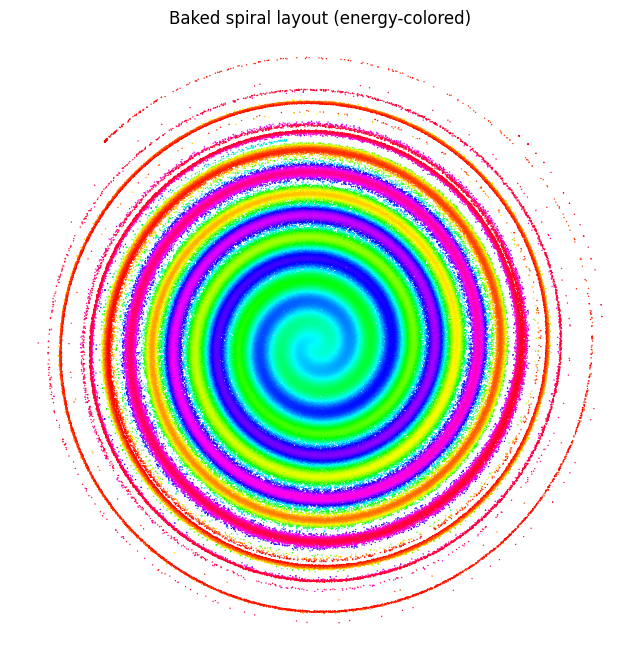

In [46]:
# polar
SPREAD = 3
r = np.sqrt(xn**2 + yn**2)*SPREAD
theta = np.arctan2(yn, xn)

# OPTIONAL: baked spiral
SPIRAL_STRENGTH = 10.0
theta = theta + r * SPIRAL_STRENGTH

# baked randomness (same formula)
noise = (np.sin(xn * 12.9898 + yn * 78.233) * 43758.5453) % 1 - 0.5
r = r + noise * 0.02

# back to cartesian
xs = np.cos(theta) * r
ys = np.sin(theta) * r

baked = np.column_stack([xs, ys, energy]).astype(np.float32)

baked.tofile("../dataset/l/coords.bin")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(
    xs,
    ys,
    c=energy,
    s=1,
    cmap="hsv",
    linewidths=0
)

plt.axis("equal")
plt.axis("off")
plt.title("Baked spiral layout (energy-colored)")
plt.show()



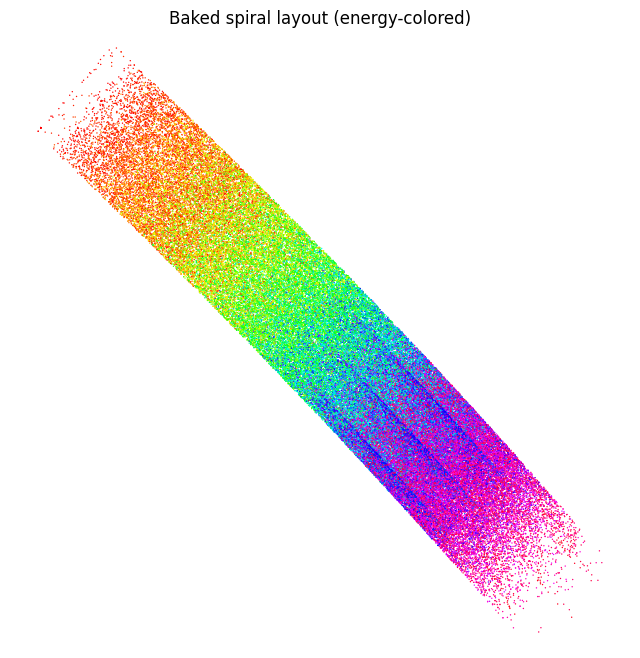

In [3]:
import matplotlib.pyplot as plt

N = 100000
xs_p = xs[:N]
ys_p = ys[:N]
energy_p = energy[:N]

plt.figure(figsize=(8, 8))
plt.scatter(
    xs_p,
    ys_p,
    c=energy_p,
    s=1,
    cmap="hsv",
    linewidths=0
)

plt.axis("equal")
plt.axis("off")
plt.title("Baked spiral layout (energy-colored)")
plt.show()


In [ ]:
 --- REVERSING THE COORDS FOR SONGS ---